# 10720PHYS401200 Homework-1

## Problem 1: Direct sampling of π

Implement direct samplig of π. Run it **twenty** times each for $N=10^0, 10^1, 10^2, \dots, 10^8$. Define $Z_r(N)=N_{hit}/N$, where $r=1,\dots, 20$. Convince yourself that $Z_r(N)$ converges towards $\pi/4$ as $N\rightarrow \infty$. Find
$$
  \frac{1}{20} \sum_{r=1}^{20} \left(Z_r(N)-\frac{\pi}{4}\right)^2
$$
and
$$
  \frac{1}{20} \sum_{r=1}^{20} \left(Z_r(N)-\bar{Z}(N)\right)^2
$$
from the runs and plot them as a function of $N$. Estimate how do they scale with $N$?

**Note:** For a set of data from a simulation, $x_i$, $(i=1,\dots,N)$, i.e., a *sample* of data. The sample mean $\bar{x}$ and the sample standard deviation $s$ are defined by
$$
  \bar{x} \equiv \frac{1}{N} \sum_{i=1}^N x_i, \;
  s^2 \equiv \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2.
$$

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

### Note: My computer can only compute to $N = 10^6$

In [1]:
N_num = [10**i for i in range(7)]
N_power = [i for i in range(len(N_num))]
N_rnd = 20

Sample_err = []
Sample_mean = []
Sample_std = []
for N in N_num:
    Zrs = []
    print('\n{:10s} {:10s} {:14s} {:10s}'.format('N_Run', 'Est of π', 'Error', 'Std'))
    for run in range(N_rnd):
        N_hit = 0
        for hit in range(N):
            x = np.random.random()*2 - 1
            y = np.random.random()*2 - 1
            if x**2 + y**2 <= 1:
                N_hit += 1
        Zrs.append(N_hit/N)
    mean, err, std = (sum(Zrs)/N_rnd), [], []
    for Zr in Zrs:
        err.append((Zr-(np.pi/4))**2)
        std.append((Zr-mean)**2)
    Sample_err.append(sum(err)/N_rnd)
    Sample_std.append(sum(std)/N_rnd)
    Sample_mean.append(sum(Zrs)/N_rnd)
    print('{:^10d} {:.6f}   {:.10f}   {:.10f}'.format(N, mean*4, sum(err)/N_rnd, sum(std)/N_rnd))


N_Run      Est of π   Error          Std       
    1      3.400000   0.1316733973   0.1275000000

N_Run      Est of π   Error          Std       
    10     3.160000   0.0189211769   0.0189000000

N_Run      Est of π   Error          Std       
   100     3.076000   0.0018378998   0.0015690000

N_Run      Est of π   Error          Std       
   1000    3.146400   0.0001674844   0.0001660400

N_Run      Est of π   Error          Std       
  10000    3.140660   0.0000138596   0.0000138053

N_Run      Est of π   Error          Std       
  100000   3.140718   0.0000029491   0.0000029013

N_Run      Est of π   Error          Std       
 1000000   3.141498   0.0000003065   0.0000003059

N_Run      Est of π   Error          Std       
 10000000  3.141457   0.0000000386   0.0000000375

N_Run      Est of π   Error          Std       
100000000  3.141611   0.0000000020   0.0000000019


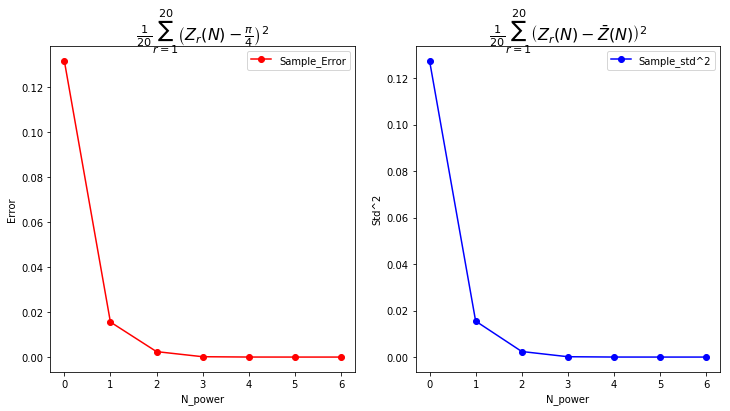

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(N_power, Sample_err, 'ro-', label='Sample_Error')
plt.title(r'$\frac{1}{20} \sum_{r=1}^{20} \left(Z_r(N)-\frac{\pi}{4}\right)^2$', fontsize=16)
plt.xlabel(r'N_power')
plt.ylabel(r'Error')
plt.legend()
plt.subplot(1,2,2)
plt.plot(N_power, Sample_std, 'bo-', label='Sample_std^2')
plt.title(r'$\frac{1}{20} \sum_{r=1}^{20} \left(Z_r(N)-\bar{Z}(N)\right)^2$', fontsize=16)
plt.xlabel(r'N_power')
plt.ylabel(r'Std^2')
plt.legend()
plt.show()